<a href="https://colab.research.google.com/github/mosahle7/ML/blob/main/Image_Compression_using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!kaggle datasets download -d 'rahulogoel/some-random-png-files'

Dataset URL: https://www.kaggle.com/datasets/rahulogoel/some-random-png-files
License(s): MIT
some-random-png-files.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
import zipfile
zip_ref=zipfile.ZipFile('/content/some-random-png-files.zip','r')
zip_ref.extractall('/content/png-files')
zip_ref.close()

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [45]:
og_img = plt.imread('/content/png-files/assets/macaw_bird.png')

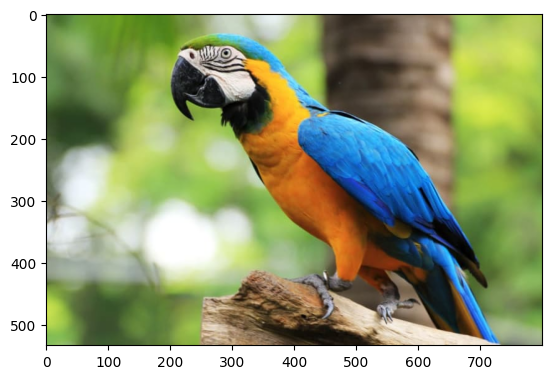

In [46]:
plt.imshow(og_img)

In [47]:
print("Shape of original image: ",og_img.shape)

Shape of original image:  (534, 800, 3)


In [48]:
X_img = np.reshape(og_img, (og_img.shape[0]*og_img.shape[1],3))

**Custom K Means**

In [ ]:
K = 16
max_iters = 10

In [ ]:
def init_centroids(X, K):
  randidx = np.random.permutation(X.shape[0])
  centroids = X[randidx[:K]]
  return centroids

In [ ]:
# def closest_centroids(X, centroids, K):
#   m, n = X.shape
#   cent_idx = np.zeros(m)
#   for i in range(m):
#     m = float('inf')
#     for j in range(K):
#       dis = np.linalg.norm(X[i]-centroids[j])
#       if dis<m:
#         m = dis
#         cent_idx[i] = j
#   return cent_idx


In [ ]:
def closest_centroids(X, centroids, K):
  distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
  cent_idx = np.argmin(distances, axis=1)  # (m,)
  return cent_idx


In [ ]:
def compute_centroids(X, cent_idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    count = np.bincount(cent_idx, minlength=K).reshape(K, 1)

    np.add.at(centroids, cent_idx, X)

    # Avoid division by zero
    nonzero_mask = count.ravel() > 0  # Convert (K,1) to (K,)
    centroids[nonzero_mask] /= count[nonzero_mask]  # Safe division

    # Reinitialize empty centroids
    for i in range(K):
        if count[i] == 0:  # If no points assigned
            largest_cluster = np.argmax(count)  # Find the largest cluster
            cluster_points = X[cent_idx == largest_cluster]
            centroids[i] = cluster_points[np.random.randint(len(cluster_points))]

    return centroids



In [ ]:
centroids = init_centroids(X_img, K)
cent_idx = closest_centroids(X_img, centroids, K)
compute_centroids(X_img, cent_idx, K)

array([[0.52018359, 0.65752396, 0.29596051],
       [0.21697627, 0.15319674, 0.08668598],
       [0.40900294, 0.53012041, 0.271897  ],
       [0.28219957, 0.25536574, 0.16002784],
       [0.07447227, 0.25030677, 0.52736654],
       [0.70594928, 0.80675518, 0.35386838],
       [0.35142728, 0.49624986, 0.17835357],
       [0.06138407, 0.07413071, 0.07305542],
       [0.53710862, 0.47980629, 0.39632767],
       [0.16264335, 0.53826544, 0.8535497 ],
       [0.70207513, 0.66376485, 0.54826178],
       [0.78031937, 0.42820129, 0.10967494],
       [0.49131817, 0.38302053, 0.25978766],
       [0.30314994, 0.31710802, 0.23569734],
       [0.79302125, 0.83662231, 0.7595815 ],
       [0.64914507, 0.59681382, 0.46072142]])

In [ ]:
def kmeans(X, K, max_iters=100, tol=1e-6):
    m, n = X.shape
    centroids = init_centroids(X, K)  # Initialize centroids
    prev_centroids = np.copy(centroids)  # Track previous centroids

    for i in range(max_iters):
        cent_idx = closest_centroids(X, centroids, K)  # Assign clusters
        centroids = compute_centroids(X, cent_idx, K)  # Update centroids

        # **Early Stopping Condition**
        if np.linalg.norm(centroids - prev_centroids) < tol:
            print(f"Converged in {i+1} iterations.")
            break  # Stop if centroids have minimal change

        prev_centroids = np.copy(centroids)  # Update previous centroids

    return centroids, cent_idx


In [ ]:
centroids, cent_idx = kmeans(X_img, K, max_iters)

In [ ]:
print("Centroids: :\n",centroids)
print("Assigned Centroids:\n",cent_idx)

Centroids: :
 [[0.35850323 0.48893996 0.2108857 ]
 [0.62441032 0.56664223 0.45966945]
 [0.81506177 0.84166767 0.73533376]
 [0.09123085 0.35602587 0.68596407]
 [0.34091987 0.29307645 0.18517086]
 [0.25155101 0.65795735 0.91400799]
 [0.93748331 0.94563025 0.91949441]
 [0.69545677 0.73754089 0.59434716]
 [0.74723919 0.39870063 0.10518546]
 [0.45825766 0.58858623 0.28001431]
 [0.22271437 0.19750671 0.13567608]
 [0.49692606 0.42704552 0.33191672]
 [0.08432882 0.09199276 0.08934921]
 [0.75818926 0.82430392 0.33418346]
 [0.55788144 0.69999618 0.28624617]
 [0.61404553 0.75053622 0.37596598]]
Assigned Centroids:
 [0 0 0 ... 1 1 1]


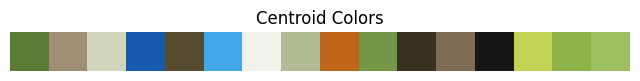

In [ ]:
centroids = (centroids * 255).astype(np.uint8)
palette = centroids.reshape(1, 16, 3)
# Display the colors
plt.figure(figsize=(8, 2))
plt.imshow(palette)  # Show as an image
plt.axis("off")  # Hide axes
plt.title("Centroid Colors")
plt.show()

In [ ]:
centroids

array([[ 91, 124,  53],
       [159, 144, 117],
       [207, 214, 187],
       [ 23,  90, 174],
       [ 86,  74,  47],
       [ 64, 167, 233],
       [239, 241, 234],
       [177, 188, 151],
       [190, 101,  26],
       [116, 150,  71],
       [ 56,  50,  34],
       [126, 108,  84],
       [ 21,  23,  22],
       [193, 210,  85],
       [142, 178,  72],
       [156, 191,  95]], dtype=uint8)

In [ ]:
# Replace each pixel with the color of the closest centroid
X_recovered = centroids[cent_idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, og_img.shape)

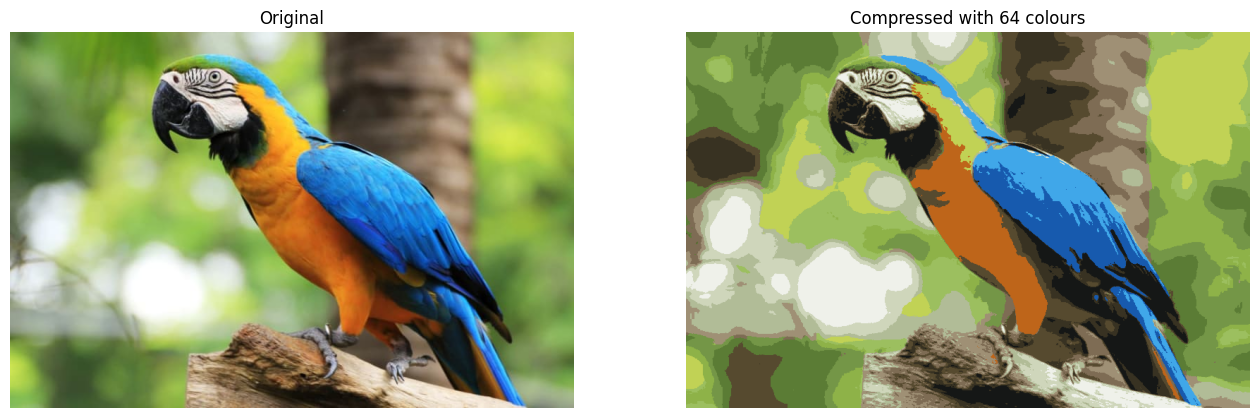

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(og_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [ ]:
K = 64
max_iters = 50
centroids, cent_idx = kmeans(X_img, K, max_iters)

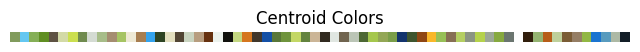

In [ ]:
centroids = (centroids * 255).astype(np.uint8)
palette = centroids.reshape(1, K, 3)
# Display the colors
plt.figure(figsize=(8, 2))
plt.imshow(palette)  # Show as an image
plt.axis("off")  # Hide axes
plt.title("Centroid Colors")
plt.show()

In [ ]:
# Replace each pixel with the color of the closest centroid
X_recovered = centroids[cent_idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, og_img.shape)

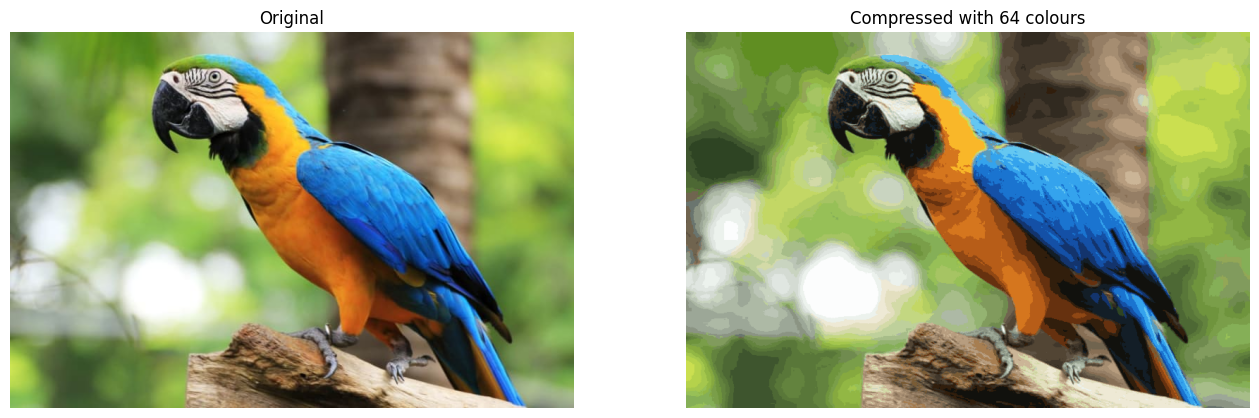

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(og_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

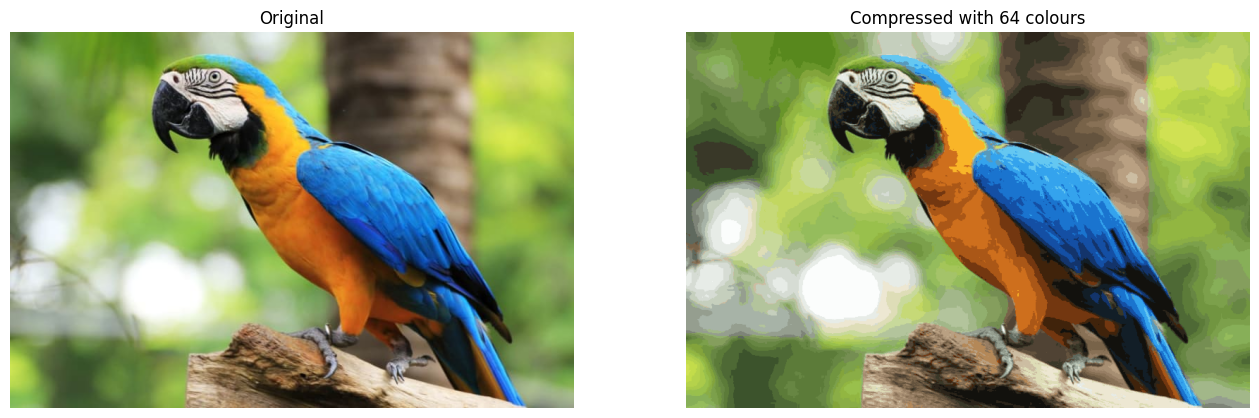

In [ ]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(og_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

**Pre-Built K Means**

In [51]:
kmeans = KMeans(n_clusters = 64,
                init = "k-means++",
                max_iter = 100,
                tol = 1e-4,
                random_state = 42,
                algorithm = 'elkan'
                )

In [52]:
kmeans.fit(X_img)

KMeans(algorithm='elkan', max_iter=100, n_clusters=64, random_state=42)

In [53]:
# Get centroids
centroids = kmeans.cluster_centers_

# Get cluster assignments
labels = kmeans.labels_

print("Centroids:\n", centroids)
print("Cluster Assignments:", labels)

Centroids:
 [[0.24639964 0.336418   0.18183152]
 [0.7541711  0.8370788  0.3918491 ]
 [0.98776054 0.9935117  0.9905236 ]
 [0.12775868 0.5311985  0.8838158 ]
 [0.4964956  0.41075593 0.30966026]
 [0.08226952 0.11119509 0.12305468]
 [0.6562046  0.6959934  0.6411396 ]
 [0.6109239  0.7603919  0.3302885 ]
 [0.80039734 0.8368174  0.77442497]
 [0.44899482 0.59170115 0.25858378]
 [0.85315347 0.48502725 0.1256369 ]
 [0.31326717 0.74083173 0.9566746 ]
 [0.24912718 0.21348763 0.17145777]
 [0.5872439  0.6265538  0.55092174]
 [0.2574074  0.4699173  0.5928916 ]
 [0.0715178  0.27217147 0.5832868 ]
 [0.51148593 0.25171235 0.07420272]
 [0.63674444 0.5366584  0.42250088]
 [0.9816134  0.72565067 0.1615102 ]
 [0.7918929  0.70654464 0.58823097]
 [0.43834397 0.5403891  0.31150046]
 [0.5167971  0.65855575 0.26550072]
 [0.35534972 0.47539324 0.2259077 ]
 [0.49458885 0.60655    0.33208755]
 [0.21964982 0.15441373 0.08929852]
 [0.41742325 0.3430364  0.25044668]
 [0.91584766 0.8972625  0.7956543 ]
 [0.78784597 0.8

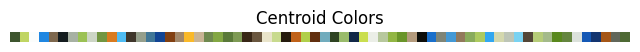

In [54]:
centroids = (centroids * 255).astype(np.uint8)
palette = centroids.reshape(1, K, 3)
# Display the colors
plt.figure(figsize=(8, 2))
plt.imshow(palette)  # Show as an image
plt.axis("off")  # Hide axes
plt.title("Centroid Colors")
plt.show()

In [55]:
inertia = kmeans.inertia_  # Sum of squared distances to closest centroid
n_iter = kmeans.n_iter_  # Number of iterations taken to converge
print(f"Converged in {n_iter} iterations with inertia {inertia}")

Converged in 37 iterations with inertia 1104.6700439453125


In [57]:
# Replace each pixel with the color of the closest centroid
X_recovered = centroids[labels, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, og_img.shape)

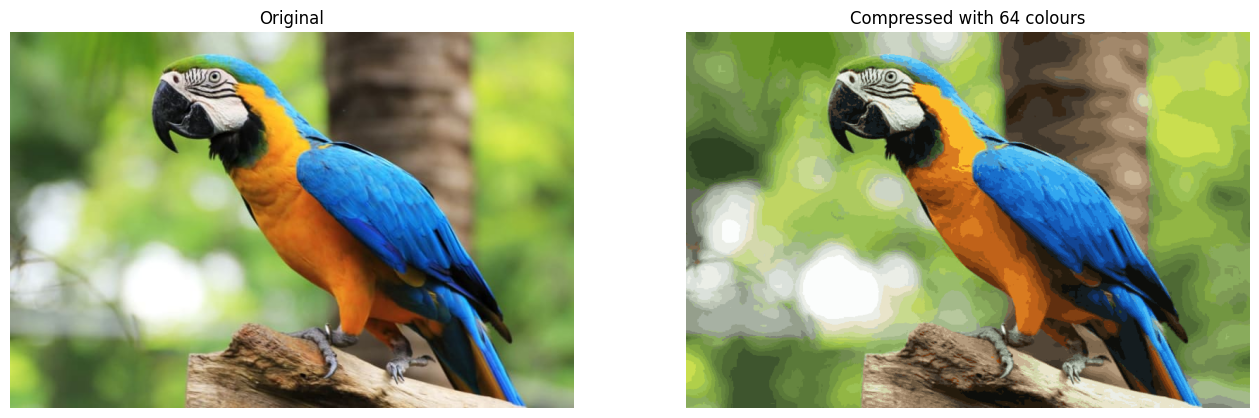

In [58]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(og_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()